In [1]:
import numpy as np
import pandas as pd
#import io

**Data**

In [2]:
data = pd.read_csv('matches_final.csv')
data2 = pd.read_csv('final_merged.csv')
data = pd.concat([data, data2], ignore_index=True, sort=False).drop_duplicates()
data.head()

,roles,match_id,win,localized_name
0,"Carry,Disabler,Initiator,Durable,Nuker",4923777696,True,Sven
1,"Carry,Initiator,Disabler,Durable",4923777696,True,Mars
2,"Carry,Nuker,Pusher,Initiator,Durable,Disabler",4923777696,True,Tiny
3,"Disabler,Jungler,Initiator,Pusher",4923777696,True,Enigma
4,"Support,Disabler,Nuker,Durable",4923777696,True,Bane


In [3]:
data.tail()

,roles,match_id,win,localized_name
475335,"Support,Disabler,Initiator,Nuker",5206499578,False,Shadow Demon
475336,"Carry,Disabler,Jungler,Nuker,Initiator",5206499578,False,Bloodseeker
475337,"Carry,Nuker",5206499578,False,Shadow Fiend
475338,"Carry,Disabler,Initiator,Durable,Nuker",5206499578,False,Legion Commander
475339,"Support,Disabler,Nuker",5206499578,False,Rubick


In [43]:
characters = data.groupby(['win','match_id'])['localized_name'].apply(','.join).reset_index()
print(characters.size)
losers = characters[characters['win'] == False].localized_name
characters  = characters[characters['win'] == True].reset_index()
characters.rename(columns={'localized_name':'winning team'}, inplace=True)
characters['losers team'] = losers
characters = characters.drop(['index', 'win', 'match_id'], axis =1)
characters['winning team'] = characters['winning team'].str.split(',')
characters['losers team'] = characters['losers team'].str.split(',')
characters

167394


,winning team,losers team
0,"[Queen of Pain, Anti-Mage, Sand King, Undying,...","[Silencer, Clockwerk, Brewmaster, Death Prophe..."
1,"[Viper, Earth Spirit, Terrorblade, Tidehunter,...","[Jakiro, Nyx Assassin, Batrider, Medusa, Outwo..."
2,"[Shadow Demon, Slardar, Queen of Pain, Dark Se...","[Ogre Magi, Winter Wyvern, Juggernaut, Storm S..."
3,"[Winter Wyvern, Lifestealer, Puck, Nyx Assassi...","[Shadow Shaman, Abaddon, Batrider, Faceless Vo..."
4,"[Bane, Slardar, Bloodseeker, Mirana, Beastmaster]","[Shadow Demon, Earth Spirit, Viper, Axe, Gyroc..."
5,"[Bane, Phantom Assassin, Necrophos, Night Stal...","[Winter Wyvern, Death Prophet, Bloodseeker, Ve..."
6,"[Disruptor, Bounty Hunter, Dragon Knight, Tide...","[Shadow Demon, Sand King, Gyrocopter, Queen of..."
7,"[Ogre Magi, Sand King, Necrophos, Undying, Tiny]","[Gyrocopter, Puck, Tidehunter, Nyx Assassin, B..."
8,"[Viper, Earth Spirit, Clockwerk, Windranger, S...","[Disruptor, Gyrocopter, Death Prophet, Sand Ki..."
9,"[Phantom Lancer, Queen of Pain, Batrider, Nyx ...","[Ogre Magi, Sand King, Dragon Knight, Undying,..."


In [10]:
characters.tail()

,winning team,losers team
27894,"[Centaur Warrunner, Drow Ranger, Shadow Fiend,...","[Slark, Puck, Underlord, Treant Protector, Dis..."
27895,"[Enchantress, Tiny, Doom, Phantom Lancer, Enigma]","[Lich, Shadow Fiend, Centaur Warrunner, Lina, ..."
27896,"[Disruptor, Slardar, Naga Siren, Storm Spirit,...","[Enchantress, Lifestealer, Outworld Devourer, ..."
27897,"[Crystal Maiden, Magnus, Underlord, Ember Spir...","[Nature's Prophet, Mirana, Outworld Devourer, ..."
27898,"[Lifestealer, Axe, Skywrath Mage, Lina, Lich]","[Shadow Demon, Bloodseeker, Shadow Fiend, Legi..."


In [6]:
roles = data.groupby(['win','match_id'])['roles'].apply(','.join).reset_index()
losers = roles[roles['win'] == False].roles
roles  = roles[roles['win'] == True].reset_index()
roles.rename(columns={'roles':'winning team'}, inplace=True)
roles['losers team'] = losers
roles = roles.drop(['index', 'win', 'match_id'], axis =1)
roles

,winning team,losers team
0,"Carry,Nuker,Escape,Carry,Escape,Nuker,Initiato...","Carry,Support,Disabler,Initiator,Nuker,Initiat..."
1,"Carry,Durable,Initiator,Disabler,Nuker,Escape,...","Support,Nuker,Pusher,Disabler,Disabler,Nuker,I..."
2,"Support,Disabler,Initiator,Nuker,Carry,Durable...","Support,Nuker,Disabler,Durable,Initiator,Suppo..."
3,"Support,Disabler,Nuker,Carry,Durable,Jungler,E...","Support,Pusher,Disabler,Nuker,Initiator,Suppor..."
4,"Support,Disabler,Nuker,Durable,Carry,Durable,I...","Support,Disabler,Initiator,Nuker,Nuker,Escape,..."
...,...,...
27894,"Durable,Initiator,Disabler,Nuker,Escape,Carry,...","Carry,Escape,Disabler,Nuker,Initiator,Disabler..."
27895,"Support,Jungler,Pusher,Durable,Disabler,Carry,...","Support,Nuker,Carry,Nuker,Durable,Initiator,Di..."
27896,"Support,Disabler,Nuker,Initiator,Carry,Durable...","Support,Jungler,Pusher,Durable,Disabler,Carry,..."
27897,"Support,Disabler,Nuker,Jungler,Initiator,Disab...","Carry,Jungler,Pusher,Escape,Nuker,Carry,Suppor..."


**Better apriori**

In [0]:
test = ['kasia', 'lubi', 'pingwiny']
test = frozenset(test)
for i in test:
  print(i)
test

kasia
pingwiny
lubi


frozenset({'kasia', 'lubi', 'pingwiny'})

In [5]:
def createNewCombinations(values, length):
    res = []
    for i in range(len(values)):
        for j in range(i + 1, len(values)):
            if(isinstance(values[i], list)):
                if(values[i][:length - 2] == values[j][:length - 2]):
                    tmp = values[i].copy()
                    tmp.append(values[j][length - 2])
                    res.append(tmp)
            else:
                tmp = []
                tmp.append(values[i])
                tmp.append(values[j])
                res.append(tmp)
    return res

In [8]:
def trim_data(D, Ck, minSupp):
    ssCnt = {}
    for tid in D:
        for can in Ck:
            if can.issubset(tid):
                if not can in ssCnt: ssCnt[can]=1
                else: ssCnt[can] += 1
    numItems = float(len(D))
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[key]/numItems
        if support >= minSupp:
            retList.insert(0,key)
        supportData[key] = support
    return retList, supportData

In [10]:
def aprioriGen(Lk, k):
    result = []
    lenght = len(Lk)
    for i in range(lenght):
        for j in range(i+1, lenght): 
            L1 = list(Lk[i])[:k-2]; L2 = list(Lk[j])[:k-2]
            L1.sort(); L2.sort()
            if L1==L2: result.append(Lk[i] | Lk[j])
    return result

In [11]:
def apriori(dataSet, minSupport = 0.01):
    C1 = []
    for el in dataSet:
        for i in el:
            if not [i] in C1:
                C1.append([i])
                
    C1.sort()
    C1  = list(map(frozenset, C1))
    D = list(map(set, dataSet))
    L1, supportData = trim_data(D, C1, minSupport)
    L = [L1]
    k = 2
    while (len(L[k-2]) > 0):
        Ck = aprioriGen(L[k-2], k)
        Lk, supK = trim_data(D, Ck, minSupport)
        supportData.update(supK)
        L.append(Lk)
        k += 1
    return L, supportData

In [12]:
def generateRules(L, supportData, minConf=0.7): 
    result = []
    for i in range(1, len(L)):
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            if (i > 1):
                rulesFromConseq(freqSet, H1, supportData, result, minConf)
            else:
                calcConf(freqSet, H1, supportData, result, minConf)
    return result

In [13]:
def calcConf(freqSet, H, supportData, result, minConf=0.7):
    prunedH = [] 
    for conseq in H:
        conf = supportData[freqSet]/supportData[freqSet-conseq] 
        if conf >= minConf: 
            print (freqSet-conseq,'-->',conseq,'conf:',conf)
            result.append((freqSet-conseq, conseq, conf))
            prunedH.append(conseq)
    return prunedH

In [42]:
def rulesFromConseq(freqSet, H, supportData, result, minConf=0.7):
    m = len(H[0])
    if (len(freqSet) > (m + 1)):
        Hmp1 = aprioriGen(H, m+1)
        Hmp1 = calcConf(freqSet, Hmp1, supportData, result, minConf)
        if (len(Hmp1) > 1):    
            rulesFromConseq(freqSet, Hmp1, supportData, result, minConf)

In [44]:
win_data = characters['winning team'].values
for array in win_data:
  array.append('win')
win_data

array([list(['Queen of Pain', 'Anti-Mage', 'Sand King', 'Undying', 'Bane', 'win']),
       list(['Viper', 'Earth Spirit', 'Terrorblade', 'Tidehunter', 'Shadow Shaman', 'win']),
       list(['Shadow Demon', 'Slardar', 'Queen of Pain', 'Dark Seer', 'Gyrocopter', 'win']),
       ...,
       list(['Disruptor', 'Slardar', 'Naga Siren', 'Storm Spirit', 'Dark Willow', 'win']),
       list(['Crystal Maiden', 'Magnus', 'Underlord', 'Ember Spirit', 'Disruptor', 'win']),
       list(['Lifestealer', 'Axe', 'Skywrath Mage', 'Lina', 'Lich', 'win'])],
      dtype=object)

In [18]:
#char2 = characters.copy()
test_data = characters.values
new_data = []
for row in test_data:
  win = row[0]
  lose = row[1]
  for i in range(len(win)):
    win[i] = 'Win_' + win[i]
  for i in range(len(lose)):
    lose[i] = 'Lose_' + lose[i]
  new_data.append(win+lose) 
test_data = new_data
test_data

[['Win_Queen of Pain',
  'Win_Anti-Mage',
  'Win_Sand King',
  'Win_Undying',
  'Win_Bane',
  'Lose_Silencer',
  'Lose_Clockwerk',
  'Lose_Brewmaster',
  'Lose_Death Prophet',
  'Lose_Gyrocopter'],
 ['Win_Viper',
  'Win_Earth Spirit',
  'Win_Terrorblade',
  'Win_Tidehunter',
  'Win_Shadow Shaman',
  'Lose_Jakiro',
  'Lose_Nyx Assassin',
  'Lose_Batrider',
  'Lose_Medusa',
  'Lose_Outworld Devourer'],
 ['Win_Shadow Demon',
  'Win_Slardar',
  'Win_Queen of Pain',
  'Win_Dark Seer',
  'Win_Gyrocopter',
  'Lose_Ogre Magi',
  'Lose_Winter Wyvern',
  'Lose_Juggernaut',
  'Lose_Storm Spirit',
  "Lose_Nature's Prophet"],
 ['Win_Winter Wyvern',
  'Win_Lifestealer',
  'Win_Puck',
  'Win_Nyx Assassin',
  'Win_Brewmaster',
  'Lose_Shadow Shaman',
  'Lose_Abaddon',
  'Lose_Batrider',
  'Lose_Faceless Void',
  'Lose_Sand King'],
 ['Win_Bane',
  'Win_Slardar',
  'Win_Bloodseeker',
  'Win_Mirana',
  'Win_Beastmaster',
  'Lose_Shadow Demon',
  'Lose_Earth Spirit',
  'Lose_Viper',
  'Lose_Axe',
  'Lose_

In [45]:
L,suppData = apriori(win_data)

In [46]:
rules_coop= generateRules(L,suppData, minConf=0.01)

frozenset({'win'}) --> frozenset({'Mars'}) conf: 0.01344134198358364
frozenset({'Mars'}) --> frozenset({'win'}) conf: 1.0
frozenset({'Grimstroke'}) --> frozenset({'Juggernaut'}) conf: 0.18655462184873947
frozenset({'Juggernaut'}) --> frozenset({'Grimstroke'}) conf: 0.16235982447586544
frozenset({'Grimstroke'}) --> frozenset({'win'}) conf: 1.0
frozenset({'win'}) --> frozenset({'Grimstroke'}) conf: 0.06398078784185814
frozenset({'win'}) --> frozenset({'Pangolier'}) conf: 0.033083623068927204
frozenset({'Pangolier'}) --> frozenset({'win'}) conf: 1.0
frozenset({'Lina'}) --> frozenset({'Sand King'}) conf: 0.13172804532577903
frozenset({'Sand King'}) --> frozenset({'Lina'}) conf: 0.11133280127693536
frozenset({'win'}) --> frozenset({'Dark Willow'}) conf: 0.030467041829456254
frozenset({'Dark Willow'}) --> frozenset({'win'}) conf: 1.0
frozenset({'Ember Spirit'}) --> frozenset({'Rubick'}) conf: 0.1365051133837261
frozenset({'Rubick'}) --> frozenset({'Ember Spirit'}) conf: 0.0877142857142857
fr

In [19]:
L,suppData = apriori(test_data)

In [20]:
rules_counter= generateRules(L,suppData, minConf=0.10001)

frozenset({'Lose_Juggernaut'}) --> frozenset({'Lose_Grimstroke'}) conf: 0.15204957102001906
frozenset({'Lose_Grimstroke'}) --> frozenset({'Lose_Juggernaut'}) conf: 0.15395752895752896
frozenset({'Win_Grimstroke'}) --> frozenset({'Win_Juggernaut'}) conf: 0.18655462184873947
frozenset({'Win_Juggernaut'}) --> frozenset({'Win_Grimstroke'}) conf: 0.16235982447586544
frozenset({'Lose_Grimstroke'}) --> frozenset({'Win_Rubick'}) conf: 0.15492277992277992
frozenset({'Lose_Grimstroke'}) --> frozenset({'Lose_Doom'}) conf: 0.15492277992277992
frozenset({'Lose_Doom'}) --> frozenset({'Lose_Grimstroke'}) conf: 0.18706293706293706
frozenset({'Lose_Ogre Magi'}) --> frozenset({'Lose_Lina'}) conf: 0.13873961895456766
frozenset({'Lose_Lina'}) --> frozenset({'Lose_Ogre Magi'}) conf: 0.12331741207121145
frozenset({'Lose_Ember Spirit'}) --> frozenset({'Win_Leshrac'}) conf: 0.12985274431057564
frozenset({'Win_Leshrac'}) --> frozenset({'Lose_Ember Spirit'}) conf: 0.12294043092522179
frozenset({'Lose_Leshrac'})

In [47]:
list(rules_coop[0][0])[0]

'win'

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [22]:
import networkx as nx

In [23]:
import os
your_path = 'portraits/'
files = os.listdir(your_path)
G=nx.Graph()
i = 0 
for file in files:
     head, sep , tail = file.partition('.')
     port = mpimg.imread(your_path + file)
     G.add_node(head,image= port)
     i+=1

In [148]:
added_heroes = []
G=nx.Graph()
your_path = 'portraits/'

for rule in rules_coop:
    if (len(list(rule[1])) < 2 or list(rule[0])[0] != 'win'): continue
    supp = rule[2]
    rule = list(rule[1])
        
    if(rule[0] not in added_heroes):
        added_heroes.append(rule[0])
        port = mpimg.imread(your_path + rule[0].lower() + '.png')
        G.add_node(rule[0], img = port, size=0.03)
        
    if(rule[1] not in added_heroes):
        added_heroes.append(rule[1])
        port = mpimg.imread(your_path + rule[1].lower() + '.png')
        G.add_node(rule[1], img = port, size=0.03)
    
    G.add_edge(rule[0], rule[1], weight=supp)

print(added_heroes)

['Juggernaut', 'Grimstroke', 'Sand King', 'Lina', 'Rubick', 'Ember Spirit', 'Leshrac', 'Abaddon', 'Gyrocopter', 'Io', 'Mirana', 'Ogre Magi', 'Centaur Warrunner', 'Tiny']


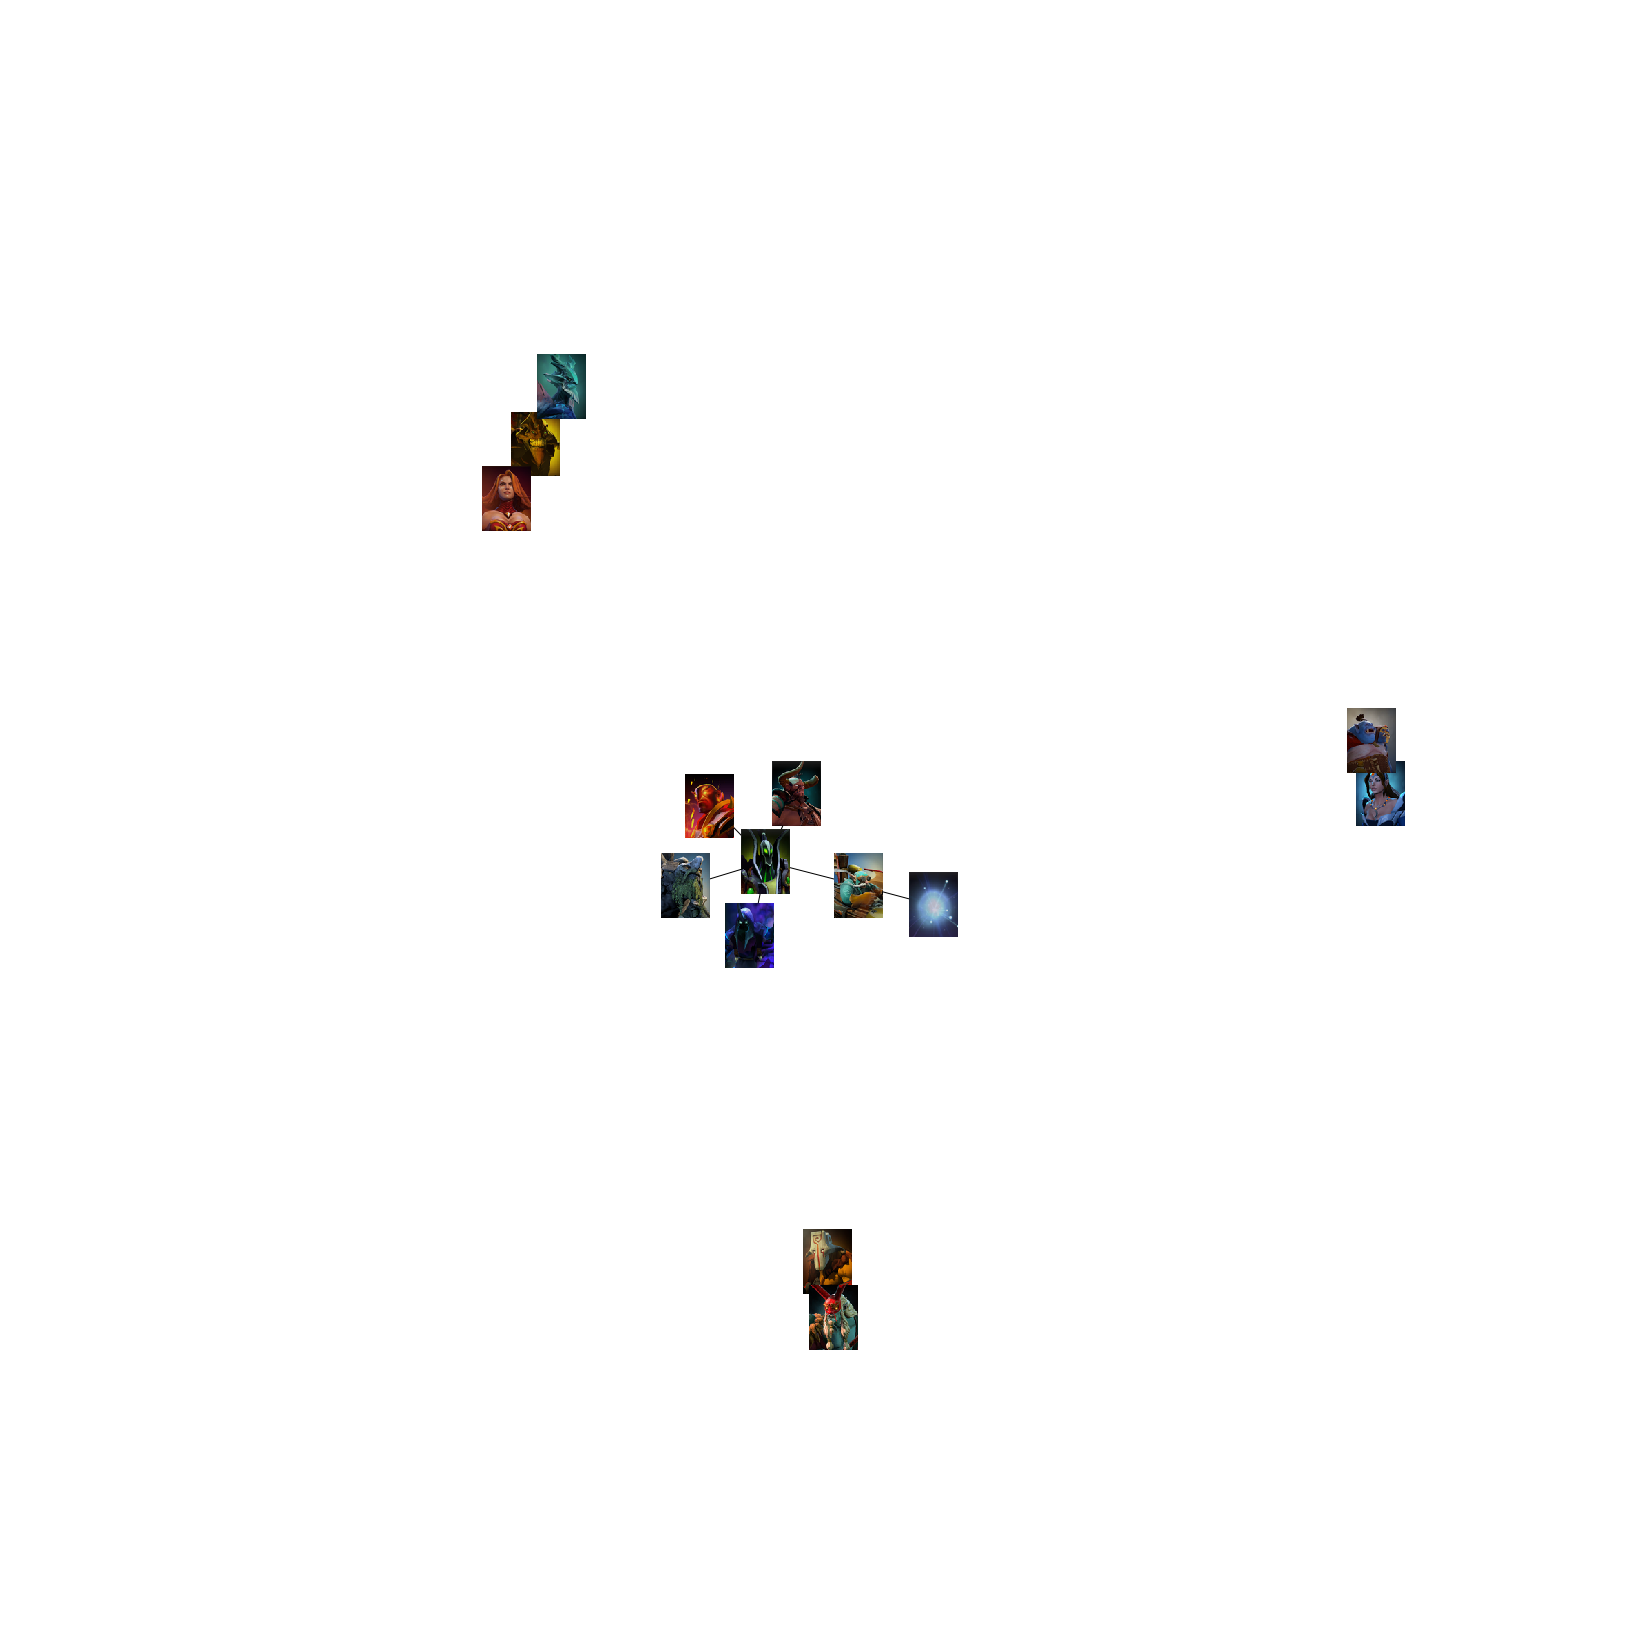

In [121]:
pos=nx.spring_layout(G)
fig=plt.figure(figsize=(30,30))
ax=plt.subplot(111)
ax.set_aspect('equal')
nx.draw_networkx_edges(G,pos,ax=ax)

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

piesize=0.2 # this is the image size
p2=piesize/2.0
for n in G:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    #a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    imsize = (G.node[n]['size'])
    a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    a.imshow(G.node[n]['img'])
    a.axis('off')


ax.axis('off')
plt.show()

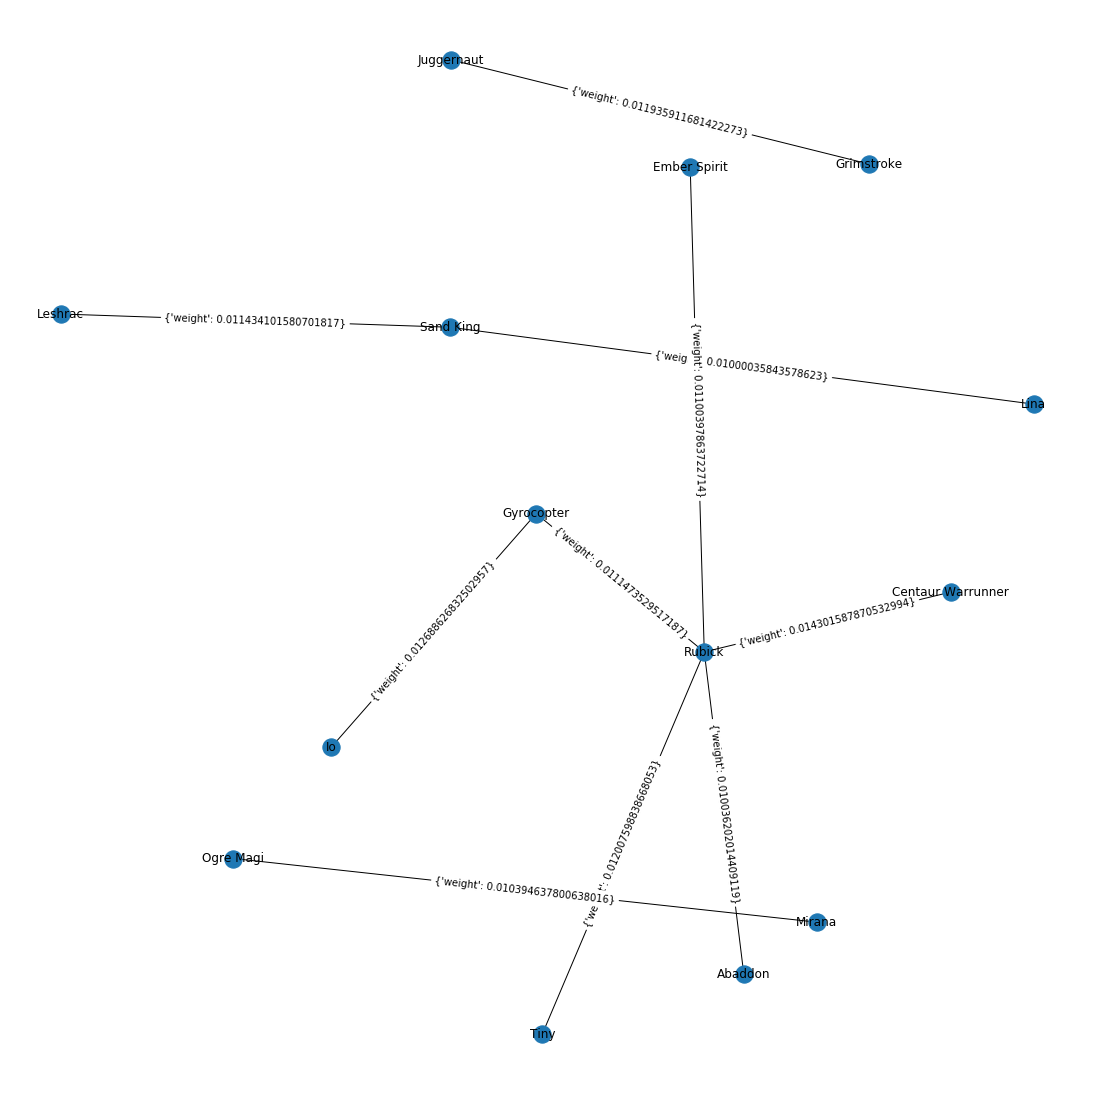

In [149]:
pos = nx.spring_layout(G)
fig=plt.figure(figsize=(15,15))

nx.draw(G, pos, with_labels=True)
node_labels = nx.get_node_attributes(G,'state')
nx.draw_networkx_labels(G, pos, labels = node_labels)
edge_labels = nx.get_edge_attributes(G,'state')
nx.draw_networkx_edge_labels(G, pos, labels = edge_labels)
plt.savefig('this.png')
plt.show()

In [163]:
added_heroes = []
G=nx.DiGraph()
your_path = 'portraits/'

for rule in rules_counter:
    hero1 = list(rule[0])[0]
    hero2 = list(rule[1])[0]
    if(not (hero1[:3] == 'Win' and hero2[:4] == 'Lose')): continue
    
    hero1 = hero1[4:]
    hero2 = hero2[5:]
    
    supp = rule[2]
        
    if(hero1 not in added_heroes):
        added_heroes.append(hero1)
        port = mpimg.imread(your_path + hero1.lower() + '.png')
        G.add_node(hero1, img = port, size=0.03)
        
    if(hero2 not in added_heroes):
        added_heroes.append(hero2)
        port = mpimg.imread(your_path + hero2.lower() + '.png')
        G.add_node(hero2, img = port, size=0.03)
    
    G.add_edge(hero1, hero2, weight=supp)

print(added_heroes)

['Leshrac', 'Ember Spirit', 'Rubick', 'Lina', 'Tiny', 'Kunkka', 'Sand King', 'Earthshaker', 'Gyrocopter', 'Lifestealer', 'Shadow Shaman']


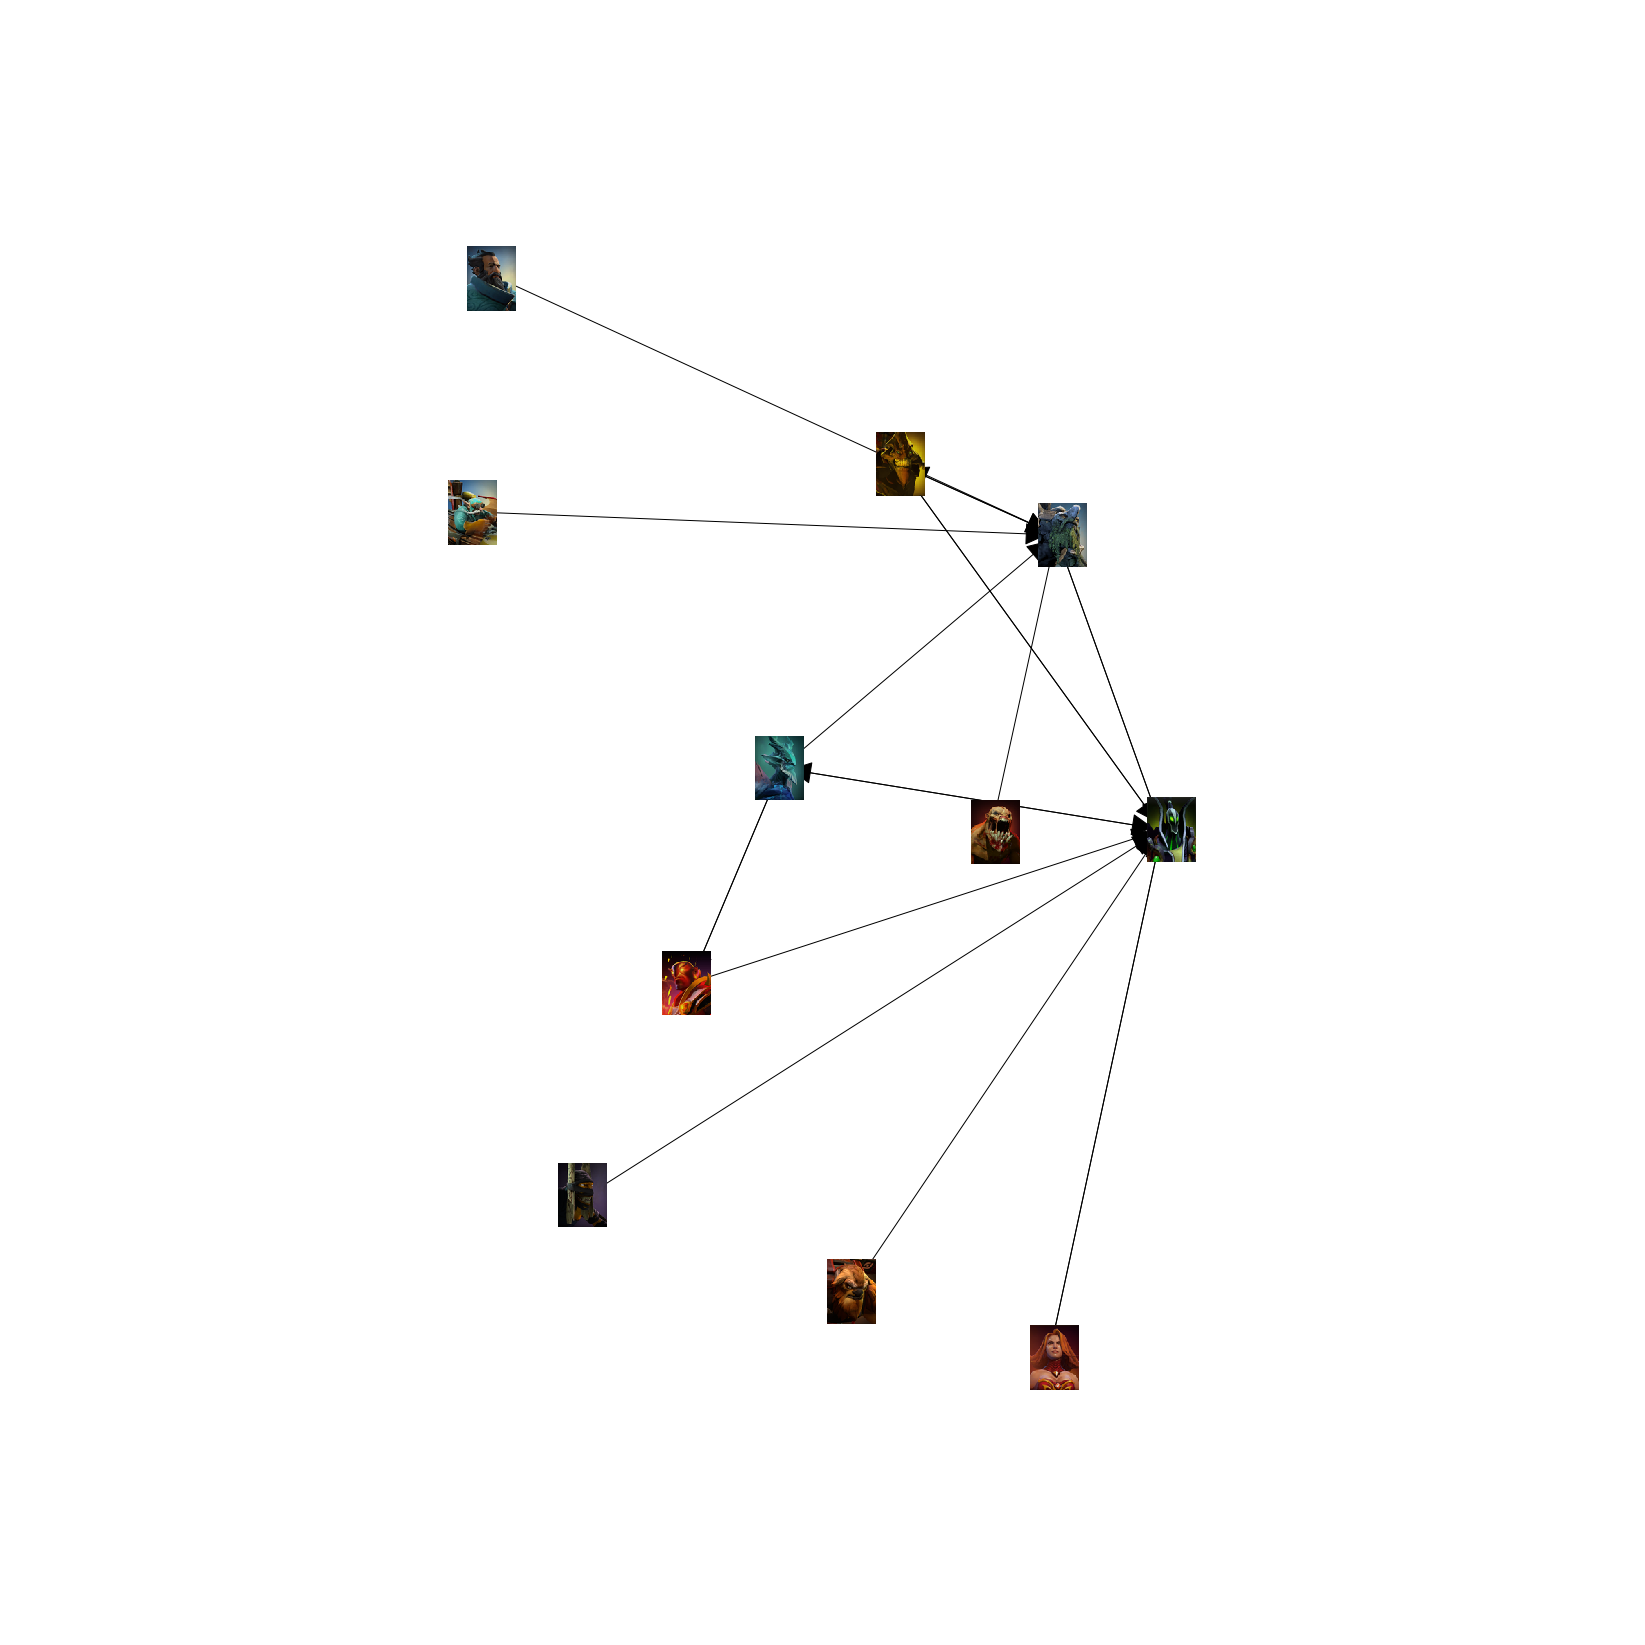

In [167]:
pos=nx.spring_layout(G)
fig=plt.figure(figsize=(30,30))
ax=plt.subplot(111)
ax.set_aspect('equal')
nx.draw_networkx_edges(G,pos,ax=ax,arrowsize=50)

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

piesize=0.2 # this is the image size
p2=piesize/2.0
for n in G:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    #a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    imsize = (G.node[n]['size'])
    a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    a.imshow(G.node[n]['img'])
    a.axis('off')


ax.axis('off')
plt.show()

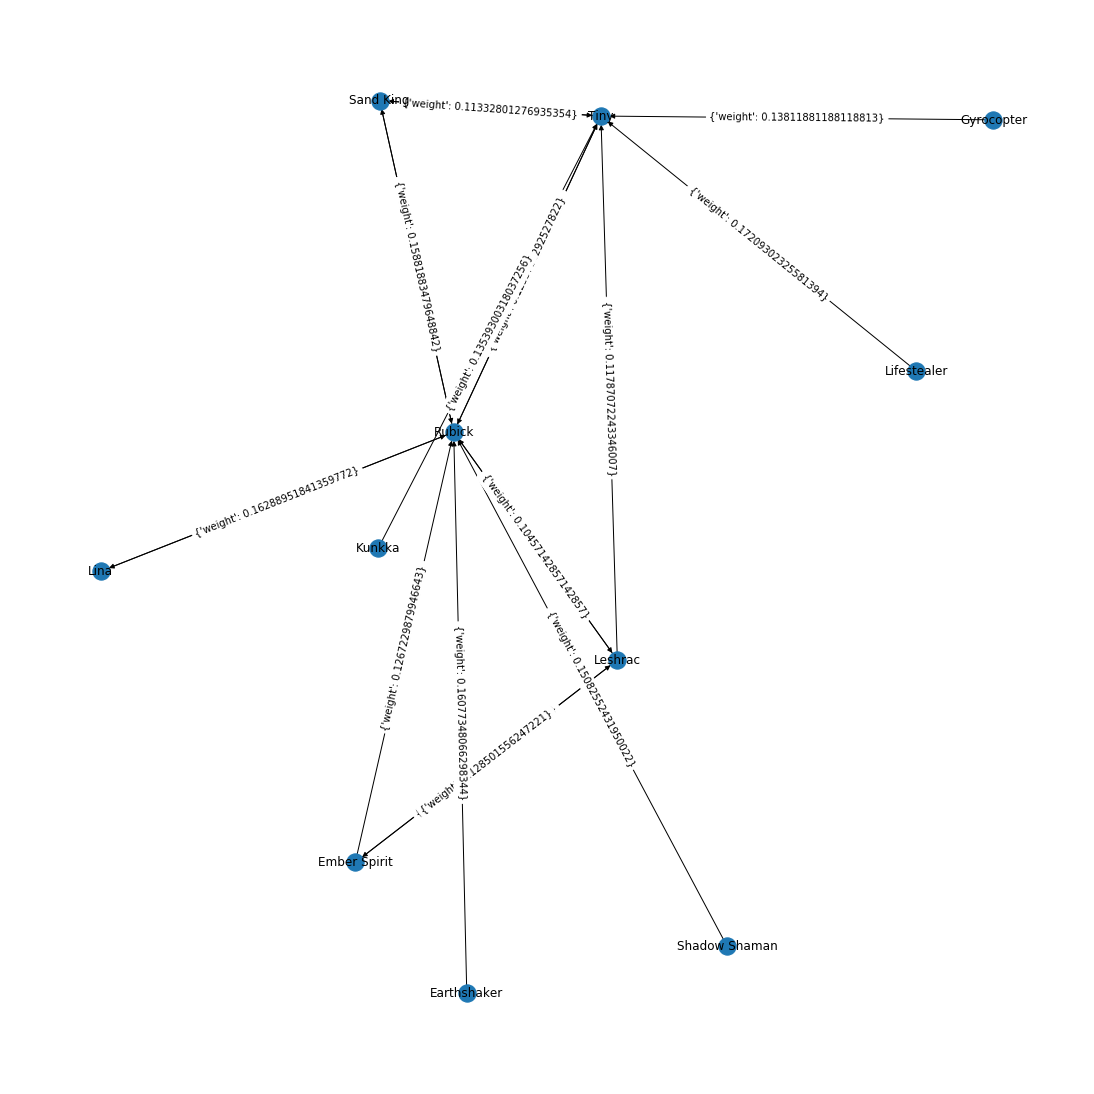

In [168]:
pos = nx.spring_layout(G)
fig=plt.figure(figsize=(15,15))

nx.draw(G, pos, with_labels=True)
node_labels = nx.get_node_attributes(G,'state')
nx.draw_networkx_labels(G, pos, labels = node_labels)
edge_labels = nx.get_edge_attributes(G,'state')
nx.draw_networkx_edge_labels(G, pos, labels = edge_labels)
plt.savefig('this.png')
plt.show()